# Point Playground

In the following we provide a playground where you can set reference points to calculate H, validation points to calculate the errors, and get the result immedieately.

In [3]:
%matplotlib widget
import cv2
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import pickle
import datetime
from pathlib import Path
from IPython.display import display

In [4]:
pv_name = 'DJI_0026.JPG'
tv_name = 'DJI_0017.JPG'

img_pv = cv2.imread(pv_name)
img_tv = cv2.imread(tv_name)

### Determine Reference & Validation Points

Output()

Button(description='Save..', style=ButtonStyle())

Output()

Button(description='Load..', style=ButtonStyle())

Output()

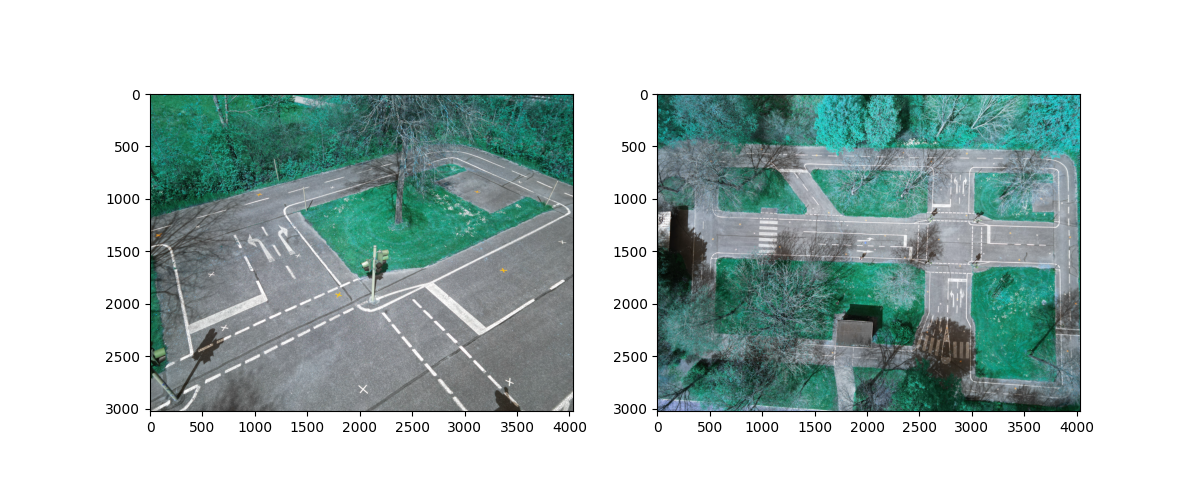

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(img_pv)
axs[1].imshow(img_tv)
out = widgets.Output()

reference_pts_pv = []
validation_pts_pv = []
reference_pts_tv = []
validation_pts_tv = []
            
@out.capture()
def onpress(event):
    if event.inaxes in [axs[0]]:
        ax = axs[0]
        if event.key == '[':
            reference_pts_pv.append([event.xdata, event.ydata])
            ax.plot(event.xdata, event.ydata, marker='x', markersize=12, c='cyan')
        if event.key == ']':
            validation_pts_pv.append([event.xdata, event.ydata])
            ax.plot(event.xdata, event.ydata, marker='x', markersize=12, c='orange')
    if event.inaxes in[axs[1]]:
        ax = axs[1]
        if event.key == '[':
            reference_pts_tv.append([event.xdata, event.ydata])
            ax.plot(event.xdata, event.ydata, marker='x', markersize=12, c='cyan')
        if event.key == ']':
            validation_pts_tv.append([event.xdata, event.ydata])
            ax.plot(event.xdata, event.ydata, marker='x', markersize=12, c='orange')
            
display(out)
cid = fig.canvas.mpl_connect('key_press_event', onpress)
save_button = widgets.Button(description="Save..")
load_button = widgets.Button(description="Load..")
output1 = widgets.Output()
output2 = widgets.Output()

display(save_button, output1)
display(load_button, output2)

def on_save_button_clicked(b):
    with output:
        save_reference_pts()
        print("Saved.")
def on_load_button_clicked(b):
    with output:
        input_folder = '.'
        reference_pts_pv, reference_pts_tv = load_reference_pts(input_folder)
        print("Loaded.")

save_button.on_click(on_save_button_clicked)
load_button.on_click(on_load_button_clicked)
# Calculate Button here.
# Save Button.
# Load Button.

In [6]:
reference_pts_pv

[[1520.8212903225804, 1240.9368838205646],
 [1806.9632258064516, 716.3433354334684],
 [3437.9722580645166, 868.9523676915323],
 [2722.6174193548386, 1498.464625756049]]

### Load Points from Annotation Files

In [13]:
filename = 'DJI_0017_blue.txt'
gt_validation_pts_tv = {}
with open(filename, 'r') as file:
    for line in file:
        name, x, y = line.split()
        out[name] = (float(x), float(y))
out

{'b1': (515.650467637815, 647.6652625462775),
 'b2': (996.7664578845125, 533.7901218658681),
 'b3': (1520.999412479551, 592.2235660357175),
 'b4': (1971.7460341642466, 707.754361672268),
 'b5': (2348.2342073038285, 565.7079187585919),
 'b6': (2614.344243058561, 650.8771170847311),
 'b7': (2953.4462544365133, 574.6260552082379),
 'b8': (3679.6899450648452, 724.7704253917237),
 'b9': (3661.7753514098304, 1004.5272652305568),
 'b10': (531.6170662268872, 1388.944807948535),
 'b11': (790.7678493157598, 1248.2367844102914),
 'b12': (1168.728707692485, 1463.4127595798732),
 'b13': (1636.7946013225383, 1137.7230332622732),
 'b14': (1802.0177461745584, 1533.0256796773567),
 'b15': (1991.8564271595494, 1210.4507507883015),
 'b16': (2173.991724971356, 1358.0482686843113),
 'b17': (2363.5182702807733, 1564.8843738825492),
 'b18': (2686.783913094363, 1392.5278732977442),
 'b19': (2949.5036670865306, 1164.3101108987041),
 'b20': (2888.67130508176, 1645.0837370942838),
 'b21': (3367.5836173565276, 13

### Calculate Homography Matrix and Predicted Validation Points

In [7]:
# Transform list to numpy array
reference_pts_pv_arr = np.array(reference_pts_pv)
reference_pts_tv_arr = np.array(reference_pts_tv)
validation_pts_pv_arr = np.array(validation_pts_pv)
validation_pts_tv_arr = np.array(validation_pts_tv)

# Add Homogeneous coordinates to validation points
homogeneous_c = np.ones((validation_pts_pv_arr.shape[0], 1))
validation_pts_pv_arr = np.hstack((validation_pts_pv_arr, homogeneous_c))
homogeneous_c = np.ones((validation_pts_tv_arr.shape[0], 1))
validation_pts_tv_arr = np.hstack((validation_pts_tv_arr, homogeneous_c))

In [16]:
reference_pts_pv_arr

array([[1520.82129032, 1240.93688382],
       [1806.96322581,  716.34333543],
       [3437.97225806,  868.95236769],
       [2722.61741935, 1498.46462576]])

In [9]:
# Find Homography
h, _ = cv2.findHomography(
    reference_pts_pv_arr,
    reference_pts_tv_arr,
    method = 1,
)

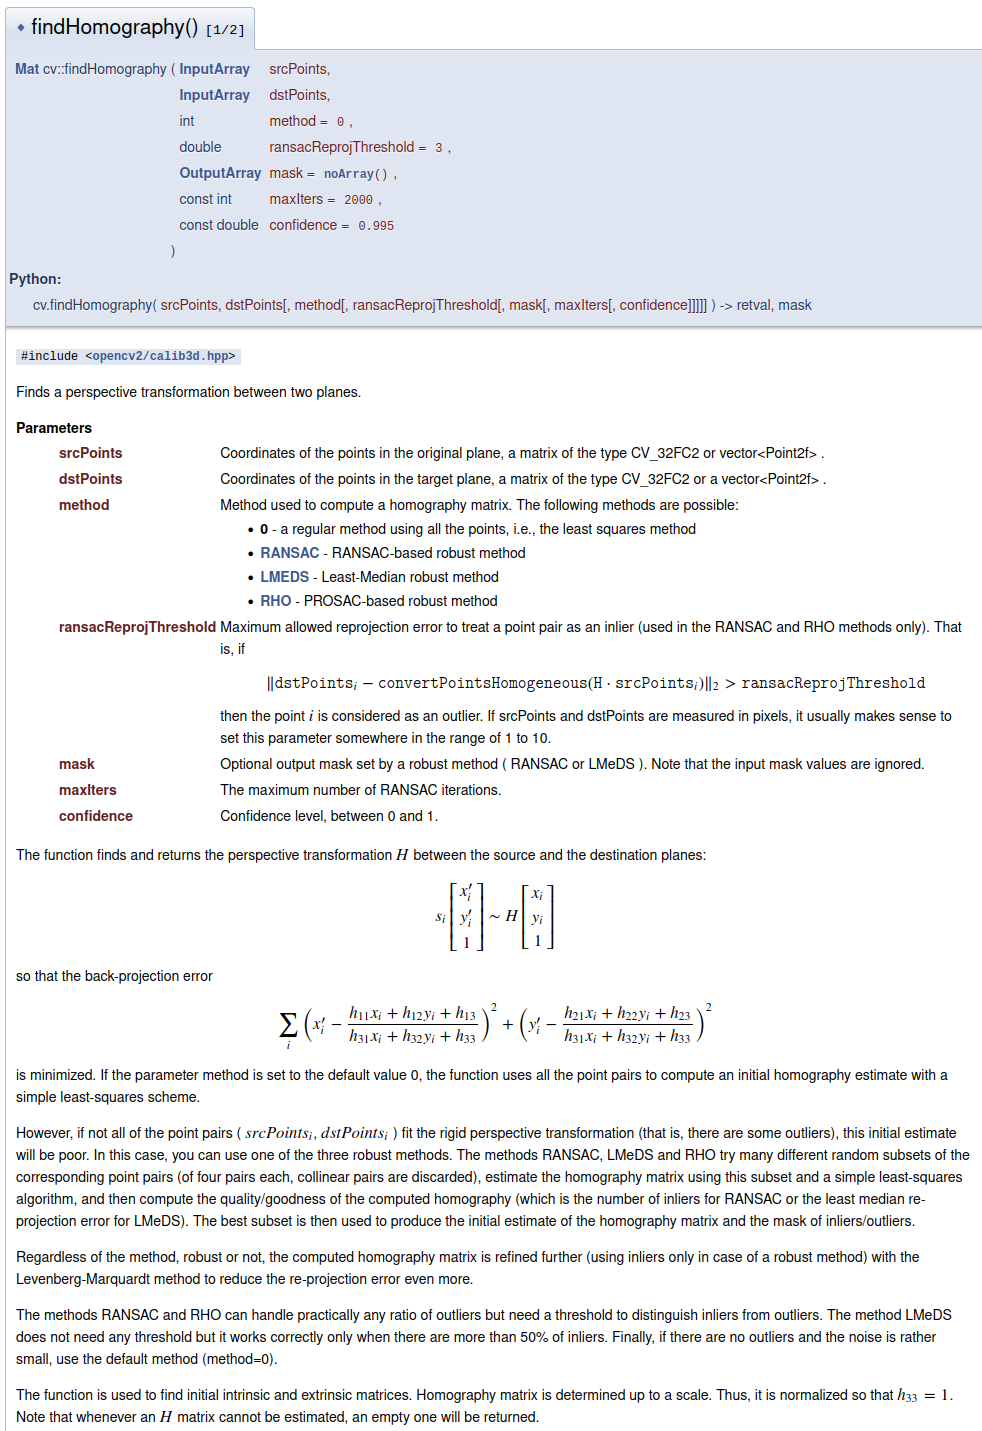

In [10]:
validation_pts_pv_arr

array([[2.22663806e+03, 1.21232269e+03, 1.00000000e+00]])

In [11]:
# Transform reference points to Top View
predicted_pts_tv = h@validation_pts_pv_arr.T
predicted_pts_tv = predicted_pts_tv / predicted_pts_tv[2]

### Plot Results

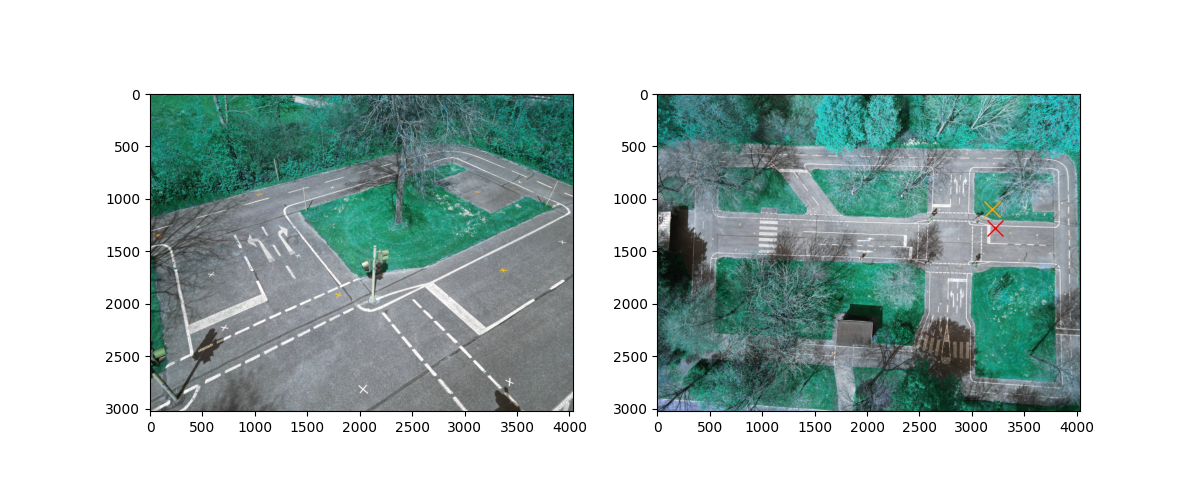

In [12]:
# Plot Predictions
def plot_results():
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(img_pv)
    axs[1].imshow(img_tv)
    for pt in predicted_pts_tv.T:
        axs[1].plot(pt[0], pt[1], marker='x', color='red', markersize=12)
    for pt in validation_pts_tv:
        axs[1].plot(pt[0], pt[1], marker='x', color='orange', markersize=12)
plot_results()

#### Saving and Loading

In [50]:
def save_reference_pts():
    output_folder = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    Path(output_folder).mkdir()
    with open(f"{output_folder}/reference_pts_pv", "wb") as fp:
        pickle.dump(reference_pts_pv, fp)
    with open(f"{output_folder}/reference_pts_tv", "wb") as fp:
        pickle.dump(reference_pts_tv, fp)
save_reference_pts()

In [87]:
input_folder = "."
def load_reference_pts(dir):
    with open(f"{dir}/reference_pts_pv", "rb") as fp:
        reference_pts_pv = pickle.load(fp)
    print(reference_pts_pv)
    with open(f"{dir}/reference_pts_tv", "rb") as fp:
        reference_pts_tv = pickle.load(fp)
    return reference_pts_pv, reference_pts_tv
reference_pts_pv, reference_pts_tv = load_reference_pts(input_folder)

[[1120.76252398 1970.26058487]
 [3135.21663578 2302.22060227]
 [ 438.8656772  1189.46995176]
 [3950.27123754  949.57542853]]
